<a href="https://colab.research.google.com/github/yatzirirain/Portfolio/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing datasets


---



In [2]:
import pandas as pd
import numpy as np

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
raw_df = pd.read_csv(url, header = None)

#print(raw_df.head(5))

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
raw_df.columns = headers

raw_df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


# Cleaning data  


---



Replacing "?" with `NaN`

In [3]:
raw_df.replace("?",np.nan, inplace=True)

Evaluating for Missing Data with methods `.isnull()` or `.notnull()`

In [4]:
missing_data = raw_df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Count missing values in each column

In [5]:
for column in missing_data.columns:
  md = missing_data[column].tolist().count(True)
  if md != 0:
    print (column)
    print(md)
    print(" ")

normalized-losses
41
 
num-of-doors
2
 
bore
4
 
stroke
4
 
horsepower
2
 
peak-rpm
2
 
price
4
 


## Deal with missing data

<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


* Replace it by mean




In [6]:
avg_norm_loss = raw_df['normalized-losses'].astype('float').mean(axis=0)
raw_df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore = raw_df['bore'].astype('float').mean(axis=0)
raw_df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = raw_df['stroke'].astype('float').mean(axis=0)
raw_df["stroke"].replace(np.nan, avg_stroke, inplace=True)

avg_horsepower = raw_df['horsepower'].astype('float').mean(axis=0)
raw_df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

avg_peak_rpm = raw_df['peak-rpm'].astype('float').mean(axis=0)
raw_df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

* Replace it by frequency

In [7]:
raw_df['num-of-doors'].value_counts().idxmax()

'four'

In [8]:
#replace the missing 'num-of-doors' values by the most frequent 
raw_df["num-of-doors"].replace(np.nan, "four", inplace=True)

* Drop data: Drop the whole row

In [9]:
# simply drop whole row with NaN in "price" column
raw_df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
raw_df.reset_index(drop=True, inplace=True)

In [10]:
raw_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


## Correct data format

In [11]:
raw_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Convert data types to proper format

In [12]:
raw_df[["normalized-losses", "horsepower"]] = raw_df[["normalized-losses", "horsepower"]].astype("int")
raw_df[["bore", "stroke", "peak-rpm", "price"]] = raw_df[["bore", "stroke", "peak-rpm", "price"]].astype("float")

In [13]:
raw_df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data standardization

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

Transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km"

In [14]:
raw_df["city-mpg"] = 235/raw_df["city-mpg"]
raw_df.rename(columns={'"city"':'city-L/100km'}, inplace=True)

raw_df["highway-mpg"] = 235/raw_df["highway-mpg"]
raw_df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

## Data Normalization


Normalization is the process of transforming values of several variables into a similar range.

*   Simple feature scale

Scaling the columns "length", "width" and "height".

In [15]:
raw_df['length'] = raw_df['length']/raw_df['length'].max()
raw_df['width'] = raw_df['width']/raw_df['width'].max()
raw_df['height'] = raw_df['height']/raw_df['height'].max()

## Binning

What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

In [16]:
bins = np.linspace(min(raw_df["horsepower"]), max(raw_df["horsepower"]), 4)
group_names = ["Low", "Medium", "High"]

raw_df['horsepower-binned'] = pd.cut(raw_df['horsepower'], bins, labels=group_names, include_lowest=True)


In [17]:
raw_df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [18]:
raw_df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Let's plot the distribution of each bin:

Text(0.5, 1.0, 'horsepower bins')

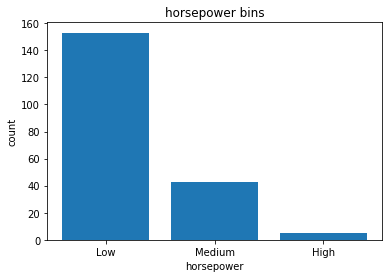

In [19]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, raw_df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

A  more straightforward way to visualize the distribution of $n$ bins

Text(0.5, 1.0, 'horsepower bins')

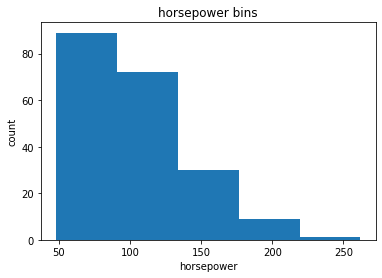

In [20]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

n=5

# draw historgram of attribute "horsepower" with bins = n
plt.pyplot.hist(raw_df["horsepower"], bins = n)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Indicator Variable (or Dummy Variable)

In [21]:
dummy_fuel_type = pd.get_dummies(raw_df['fuel-type'])

In [22]:
dummy_fuel_type.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

In [23]:
dummy_fuel_type

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [24]:
# merge data frame "raw_df" and "dummy_fuel_type" 
raw_df = pd.concat([raw_df, dummy_fuel_type], axis=1)

# drop original column "fuel-type" from "raw_df"
raw_df.drop('fuel-type', axis=1, inplace=True)


create an indicator variable for the column "aspiration"

In [25]:
dummy_aspiration = pd.get_dummies(raw_df['aspiration'])
dummy_aspiration.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
raw_df = pd.concat([raw_df, dummy_aspiration], axis=1)
raw_df.drop('aspiration', axis=1, inplace=True)


## Save cleaned data

In [26]:
raw_df.to_csv('clean_raw_df.csv')